# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами.

Выполнил студент гр. 9382 Савельев Илья, вариант 33.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при 𝑡 → $+\infty$.

## Основные теоретические положения

Система однородных линейных дифференциальных уравнений с периодическими коэффициентами:

$X'=A(t)X, A(t+T)=A(t), t\geq0$, где

$X'=(x_1',...,x_n')^T$, $\space\space$ $X=(x_1,...,x_n)^T$,

$A(t)=||a_{ij}(t)||$, $\space\space$ $a_{ij}(t) = a_{ij}(t+T)$ 

$T>0$ - период коэффициентов системы

Фундаментальная матрица такой системы - матрица $\Phi(t)$, столбцы которой являются линейно независимыми решениями системы.

$\Phi'=A(t)\Phi$

Основная матрица для фундаментальной матрицы  $\Phi(t)$ - матрица $C$, такая, что $\Phi(t+T)=\Phi(t)C, \forall t \geq 0$

Спектральный радиус матрицы $C$ - число $r(C) = \underset{i} \max{|\lambda_i|}$, где $i$ - собственные значения $C$

# Постановка задачи

Дано дифференциальное уравнение:

   $x''+a(p,t)x=0$, $a(p,t)=p+b(t)$, $b(t+T)=b(t)$, где $p$ - параметр.
   
Данное уравнение сводится к системе двух уравнений I-го порядка:

$\begin{equation}
     \begin{cases}
       u_1'=u_2\\\\
       u_2'=-a(p,t)u_1
     \end{cases}
    \end{equation}
    (1)$
    
Здесь $u_1(t)=x(t), u_2(t)=x'(t)$

Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной периодической системе, а не только к системе вида (1).

## Выполнение работы

b(t) = tg(1 + 0.2 sin 3𝑡)

p0 = 0.9500000000000003
r(p0) = 1.0000000903630708


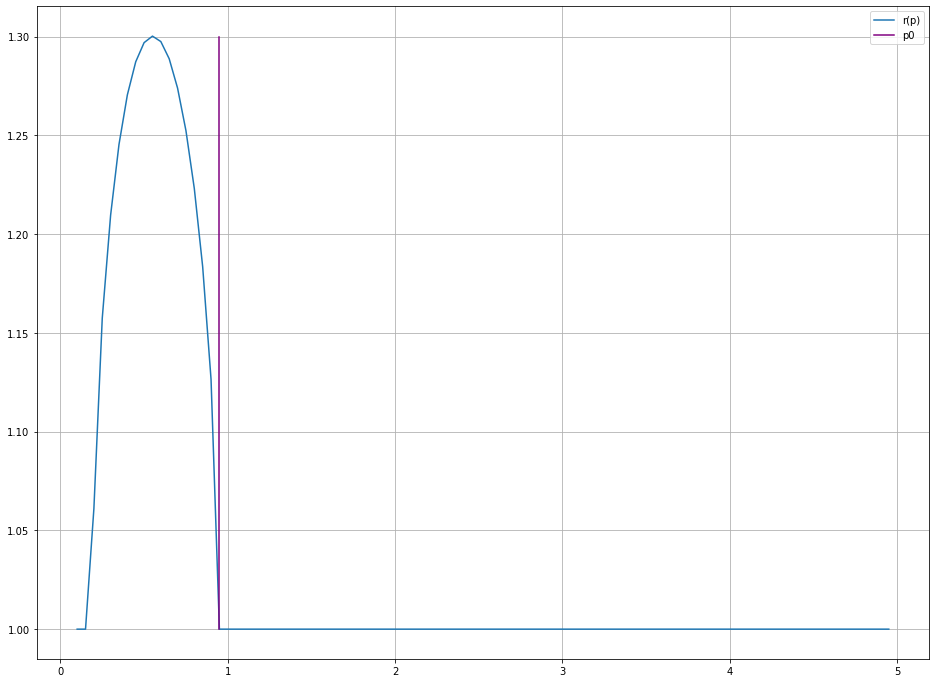

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


T = 2 * np.pi / 3
v1 = (1, 0)
v2 = (0, 1)
p_arr = np.arange(0.1, 5, 0.05)
t_arr = np.arange(0, T, 0.001)
spectral_arr = []  

def a(p, t):
    return p + np.tan(1 + 0.2 * np.sin(3 * t))

# Система
def F(u, t):  
    return [u[1], -a(p,t)*u[0]]

for p in p_arr:
    # Решение задач Коши
    u1 = integrate.odeint(F, v1, t_arr)
    u2 = integrate.odeint(F, v2, t_arr)
    # Получаем матрицу С
    C = np.array([u1[-1], u2[-1]])
    # Вычисляем спектральный радиус матрицы С
    spectral_arr.append(max(abs(np.linalg.eigvals(C))))                 

for i in range(1, len(spectral_arr)):
    if abs(spectral_arr[-i] - 1) > 0.0001:
        # Находим точку разделяющию границу зоны устойчивости и не устойчивости
        p_0 = p_arr[1 - i]
        r_0 = spectral_arr[1 - i]
        break

# Результат
print("p0 =", p_0)
print("r(p0) =", r_0)

# Графики
plt.figure(figsize=(16, 12))
plt.plot(p_arr, spectral_arr, label="r(p)")
plt.plot([p_0, p_0], [1, 1.30], color="purple", label="p0")
plt.grid(True)
plt.legend()
plt.show()


## Выводы

В результате выполнения практической работы, было исследовано однородное линейное уравнения с периодическими коэффициентами, на предмет устойчивости, была найдена точка $p_0 = 0.9500000000000003$ разделяющая зоны устойчивости и неустойчивости.